In [1]:
# Step-1: Import Necessary Libraries
import numpy as np
import pandas as pd

In [2]:
# Step-2 : Loading the dataset
df = pd.read_csv("retail_sales_dataset.csv")
print(df.head(10),"\n\n")
print(df.info(),"\n\n")
print(df.describe())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

In [3]:
# Step-3: Data Preprocessing 
# check the missing values
print(df.isnull().sum())
# selecting the relevant features for clustering
print(df.columns)
features = ['Age','Quantity', 'Price per Unit', 'Total Amount']
# below step is used to avoid confusion with the following
# df[['Age','Quantity', 'Price per Unit', 'Total Amount']]
x = df[features]
# Standardizing the data
from sklearn.preprocessing import StandardScaler

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [4]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler[:5]

array([[-0.54056476,  0.42926498, -0.68512265, -0.5467043 ],
       [-1.12559156, -0.45399629,  1.68846418,  0.97191876],
       [ 0.62948884, -1.33725757, -0.7906154 , -0.76109815],
       [-0.32117971, -1.33725757,  1.68846418,  0.07861108],
       [-0.83307816, -0.45399629, -0.68512265, -0.63603507]])

In [5]:
# Step-4 : Determine the optimal no of clusters
from sklearn.cluster import KMeans

In [6]:
wcss=[]
for i in range(2,11):
    k=KMeans(n_clusters=i,init='k-means++',random_state=42)
    k.fit(x_scaler)
    wcss.append(k.inertia_)

C:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
wcss 
# Within Clusters sum squares : measures how tightly the data points clustered around centriods 

[2413.7255623331757,
 1919.335508488933,
 1471.7800268965711,
 1363.2210426652007,
 1051.1158739402479,
 929.6545052649503,
 849.1440531776675,
 836.7598485823005,
 657.0692536445785]

In [8]:
a=[]
for i in range(1,11):
    print(i)
    a.append(i)
    print(a)

1
[1]
2
[1, 2]
3
[1, 2, 3]
4
[1, 2, 3, 4]
5
[1, 2, 3, 4, 5]
6
[1, 2, 3, 4, 5, 6]
7
[1, 2, 3, 4, 5, 6, 7]
8
[1, 2, 3, 4, 5, 6, 7, 8]
9
[1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [9]:
# Plot Elbow method
import matplotlib.pyplot as plt

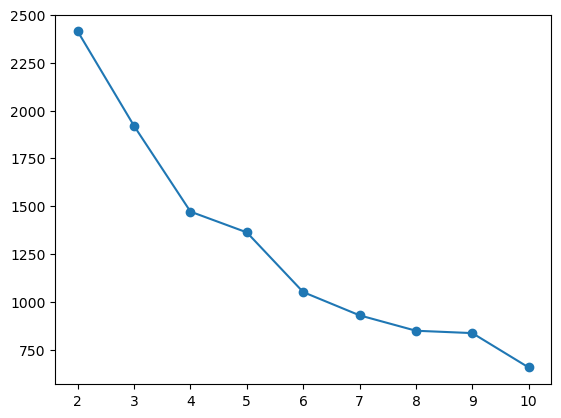

In [10]:
plt.plot(range(2,11),wcss,marker='o')


In [11]:
# step-5: KMeans Clustering 
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=42)
df['Cluster']=kmeans.fit_predict(x_scaler)
df.head()

C:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Cluster
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0


In [12]:
# Step-6: Visualizing clusters using PCA
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=2)
x_pca = pca.fit_transform(x_scaler)
x_pca[:5]

array([[-0.65708352, -0.84409973],
       [ 1.72575328, -0.33956636],
       [-1.48454179,  0.87659746],
       [ 0.77626109,  0.68859974],
       [-0.95519422, -0.73832597]])

In [14]:
x_pca[:,0][:5]

array([-0.65708352,  1.72575328, -1.48454179,  0.77626109, -0.95519422])

In [15]:
df['PCA1']=x_pca[:,0]
df['PCA2']=x_pca[:,1]

In [16]:
import seaborn as sns

<Axes: xlabel='PCA1', ylabel='PCA2'>

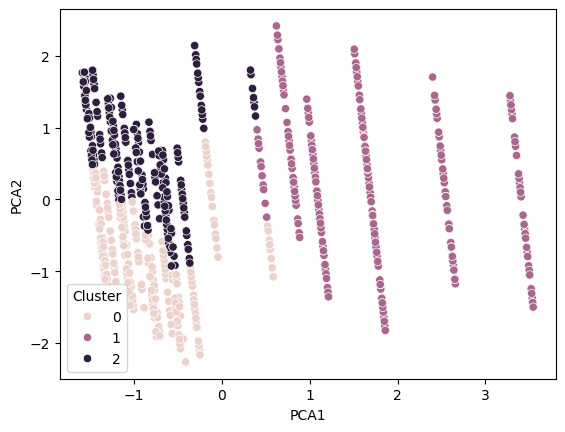

In [17]:
sns.scatterplot(x=df['PCA1'],y=df['PCA2'],hue=df['Cluster'])